<a href="https://colab.research.google.com/github/imabari/covid19-data/blob/master/vaccine/%E6%96%B0%E5%9E%8B%E3%82%B3%E3%83%AD%E3%83%8A%E3%83%AF%E3%82%AF%E3%83%81%E3%83%B3%E3%81%AE%E6%8E%A5%E7%A8%AE%E7%8A%B6%E6%B3%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib
!pip install japanmap

     |████████████████████████████████| 4.1MB 7.4MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=5e031c36985067307c907391896ad80c49eb1feb5004a8a14d822cb52d307386
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib
     |████████████████████████████████| 174kB 7.7MB/s 
     |████████████████████████████████| 51.0MB 89kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [2]:
import pandas as pd
from japanmap import pref_code

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
df = pd.read_json("https://vrs-data.cio.go.jp/vaccination/opendata/latest/prefecture.ndjson", lines=True)

In [5]:
df.to_csv("output.csv")

In [6]:
# 都道府県を指定
pref = pref_code("愛媛県")

In [7]:
df1 = df[df["prefecture"] == pref].copy()

# 前処理

In [8]:
df1["gender"] = df1["gender"].replace({"M": "男性", "F": "女性", "U": "不明"})
df1["age"] = df1["age"].replace({"-64": "64歳以下", "65-": "65歳以上", "UNK": "不明"})
df1["medical_worker"] = df1["medical_worker"].map({True: "医療従事者", False: "一般"})

In [9]:
# 内容確認
df1.pivot_table(values="count", index=["medical_worker", "age", "gender"], columns="status", aggfunc="sum", margins=True)

status                           1     2    All
medical_worker age   gender                    
一般             64歳以下 女性        816   102    918
                     男性        372    35    407
               65歳以上 女性      23360  2506  25866
                     男性      13770   768  14538
               不明    不明         65     6     71
All                          38383  3417  41800

# 日別

## 年代・性別

In [10]:
df2 = (
    df1.pivot_table(index="date", columns=["age", "gender"], values="count")
    .fillna(0)
    .astype(int)
)
df2

age        64歳以下     65歳以上      不明
gender        女性  男性    女性   男性 不明
date                              
2021-04-12     6   3    41   18  2
2021-04-13     0   1    55   17  1
2021-04-14     7   2    20    4  0
2021-04-15     7   1    17    6  0
2021-04-16     0   0    62   18  0
2021-04-17     0   0    23    7  0
2021-04-19    14   3   159   34  1
2021-04-20    15   2   169   63  1
2021-04-21    16   3   242   78  1
2021-04-22     8   8   172   38  1
2021-04-23    77  26   212   51  2
2021-04-24    70  22    35   19  0
2021-04-25    50  16    37    9  0
2021-04-26    49   9   236   71  0
2021-04-27    86  10   353   98  1
2021-04-28    42  10   171   59  4
2021-04-29     0   0    26    9  0
2021-04-30    38   8   265   82  1
2021-05-01     5   2   146   42  3
2021-05-02     4   1   116   37  0
2021-05-03     1   0    31   14  0
2021-05-04     2   0    42   13  0
2021-05-05     0   0    39    4  0
2021-05-06     1   4    84   28  2
2021-05-07     8   2   159   49  2
2021-05-08     2   0   112   34  1
2021-05-09     0   0    43   27  0
2021-05-10     3   1   343  167  7
2021-05-11     2   2   462  196  3
2021-05-12     1   2   407  181  1
2021-05-13     4   2   396  175  4
2021-05-14     4   2   338  129  1
2021-05-15     4   1   122   50  3
2021-05-16     3   2    66   49  0
2021-05-17    11   3   546  290  1
2021-05-18    16   5   765  406  2
2021-05-19     8   8   593  356  2
2021-05-20    14   3   650  392  4
2021-05-21    12   5   646  346  1
2021-05-22    37  22   559  379  1
2021-05-23    17  19   412  317  1
2021-05-24     8  24  1008  678  2
2021-05-25    36  32  1137  812  2
2021-05-26    30  28  1210  832  3
2021-05-27    25  18  1051  675  2
2021-05-28    34  17   505  313  1

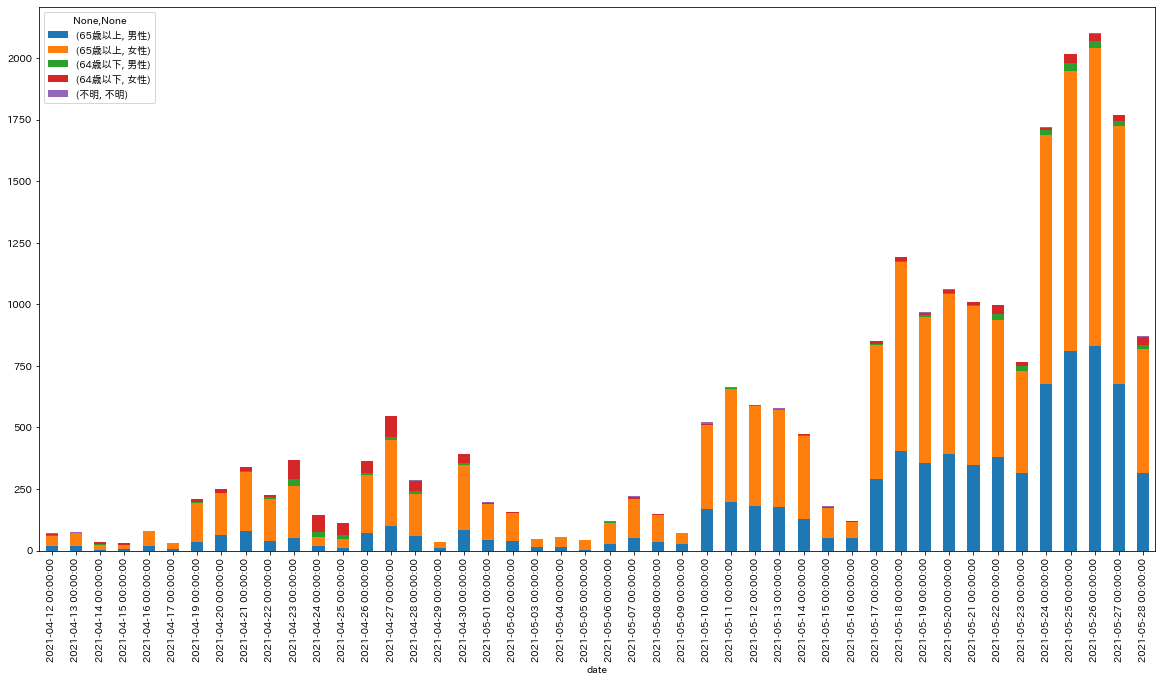

In [11]:
df2.columns = df2.columns.to_flat_index()
df2 = df2.reindex(
    columns=(
        ("65歳以上", "男性"),
        ("65歳以上", "女性"),
        ("64歳以下", "男性"),
        ("64歳以下", "女性"),
        ("不明", "不明"),
    )
)
df2.plot.bar(stacked=True, figsize=(20, 10))

# グラフを保存
plt.savefig("01.png", dpi=200, bbox_inches="tight")
plt.show()

## 年代・接種回数

In [12]:
df3 = (
    df1.pivot_table(index="date", columns=["age", "status"], values="count")
    .fillna(0)
    .astype(int)
)
df3

age        64歳以下     65歳以上      不明   
status         1   2     1    2  1  2
date                                 
2021-04-12     4   0    29    0  2  0
2021-04-13     1   0    36    0  1  0
2021-04-14     4   0    12    0  0  0
2021-04-15     4   0    11    0  0  0
2021-04-16     0   0    40    0  0  0
2021-04-17     0   0    15    0  0  0
2021-04-19     8   0    96    0  1  0
2021-04-20     8   0   116    0  1  0
2021-04-21     9   0   160    0  1  0
2021-04-22     8   0   105    0  1  0
2021-04-23    51   0   131    0  2  0
2021-04-24    46   0    27    0  0  0
2021-04-25    33   0    23    0  0  0
2021-04-26    29   0   153    0  0  0
2021-04-27    48   0   225    0  1  0
2021-04-28    26   0   115    0  4  0
2021-04-29     0   0    17    0  0  0
2021-04-30    23   0   173    0  1  0
2021-05-01     3   0    94    0  3  0
2021-05-02     2   0    76    0  0  0
2021-05-03     1   0    22    0  0  0
2021-05-04     2   0    27    0  0  0
2021-05-05     0   0    21    0  0  0
2021-05-06     2   1   102   10  0  2
2021-05-07     5   0   160   48  2  0
2021-05-08     2   0    90   56  1  1
2021-05-09     0   0    35    0  0  0
2021-05-10     2   0   439   72  7  0
2021-05-11     2   0   542  115  6  1
2021-05-12     1   0   478  110  1  1
2021-05-13     4   1   457  115  4  0
2021-05-14     3   0   393   74  1  0
2021-05-15     2   0   150   21  3  0
2021-05-16     4   1   101   14  0  0
2021-05-17    10   4   737   99  1  0
2021-05-18    11  10   969  202  2  0
2021-05-19    12   1   864   86  2  0
2021-05-20     8   0   998   44  4  0
2021-05-21     6  10   887  105  1  0
2021-05-22    23  35   812  126  1  1
2021-05-23    34   2   689   40  1  0
2021-05-24    18   3  1624   62  2  0
2021-05-25    34   0  1939   10  2  0
2021-05-26    29   0  2013   29  3  0
2021-05-27    41   2  1616  110  2  0
2021-05-28    25   0   734   84  1  0

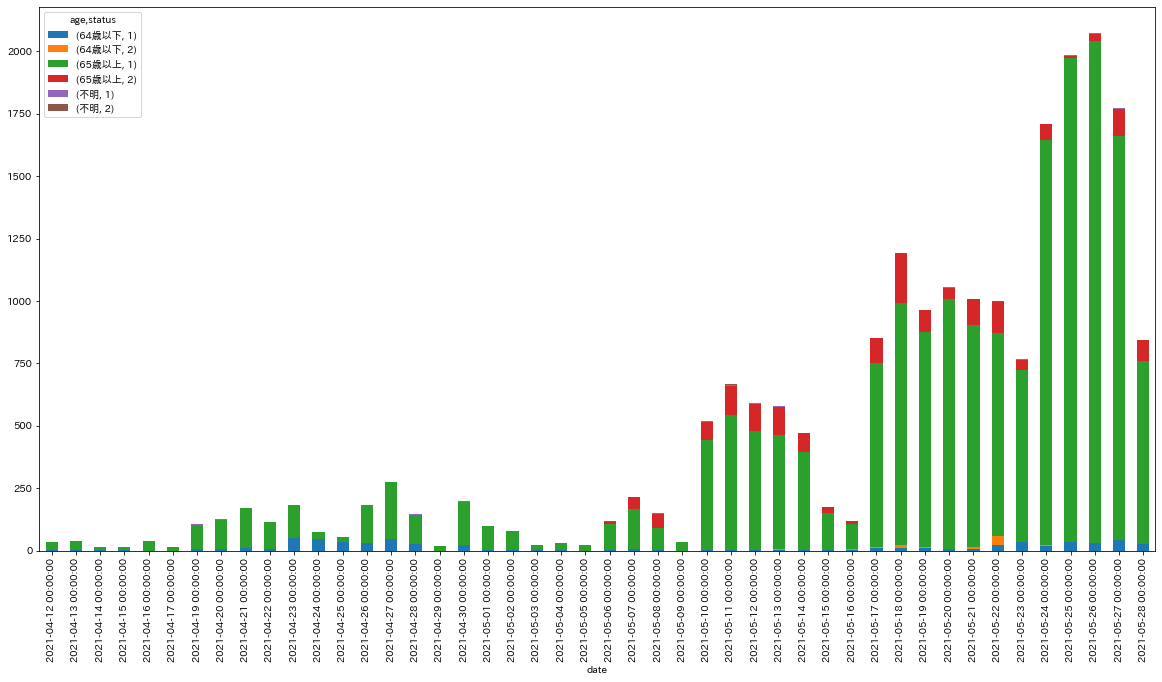

In [13]:
df3.plot.bar(stacked=True, figsize=(20, 10))

# グラフを保存
plt.savefig("02.png", dpi=200, bbox_inches="tight")
plt.show()

# 接種回数別

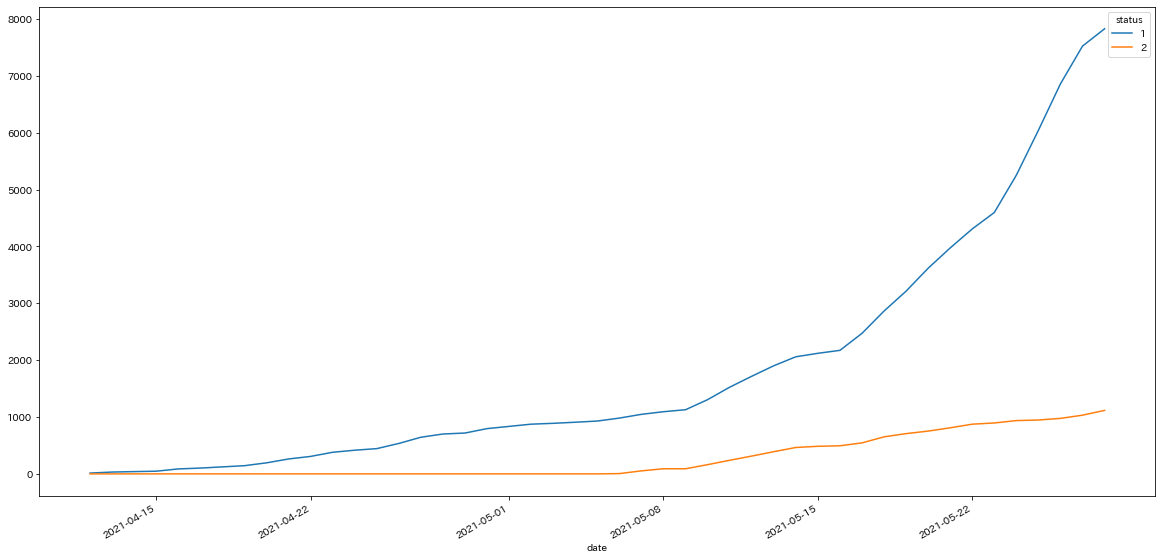

In [14]:
df4 = df1.pivot_table(index="date", columns="status", values="count").fillna(0).astype(int)
df4c = df4.cumsum()
df4c.plot(figsize=(20, 10))

# グラフを保存
plt.savefig("03.png", dpi=200, bbox_inches="tight")
plt.show()